# DESAFIO 3

In [11]:
import numpy as np
import random as rd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import matplotlib.animation as animation
from particula import Particula, Particula2, Particula3
from funcoes import step
from funcoes import lista_inicial, lista_inicial2, lista_inicial3
plt.style.use('seaborn-bright')
import lmfit
from sklearn.linear_model import LinearRegression

C:\Users\marcos220057\AppData\Local\Temp\ipykernel_7464\98335829.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-bright')


In [2]:
# parâmetros sistema:
NUM_PARTICULAS= 140
TAMANHO_CAIXA = 200
MASSA = 0.5
RAIO = 1
ECMIN = 45
CATALISE = 0.1

# parâmetros simulação:
TFIM = 40
NUM_STEPS = 400
STEP = TFIM/NUM_STEPS

In [3]:
PARTICULAS = lista_inicial2(NUM_PARTICULAS, raio = RAIO, massa = MASSA, tamanho_caixa = TAMANHO_CAIXA, reatividade = ECMIN, catalise = False)
print(len(PARTICULAS))
for i in range(NUM_STEPS):
    step(PARTICULAS, STEP, TAMANHO_CAIXA)

140


In [4]:
PARTICULAS2 = lista_inicial2(NUM_PARTICULAS, raio = RAIO, massa = MASSA, tamanho_caixa = TAMANHO_CAIXA, reatividade = ECMIN, catalise = CATALISE)
print(len(PARTICULAS))
for i in range(NUM_STEPS):
    step(PARTICULAS2, STEP, TAMANHO_CAIXA)

140


In [5]:
PARTICULAS3 = lista_inicial3(NUM_PARTICULAS, raio = RAIO, massa = MASSA, tamanho_caixa = TAMANHO_CAIXA, reatividade = ECMIN, catalise = CATALISE)
print(len(PARTICULAS))
for i in range(NUM_STEPS):
    step(PARTICULAS3, STEP, TAMANHO_CAIXA)

140


# Resultados:

In [6]:
trajetorias = []
existencia = []
cores = []
for i in PARTICULAS:
    traj = list(i.trapos)
    exist = list(i.lista_existe)
    lista_cores = list(i.lista_tipo)
    trajetorias.append(traj)
    existencia.append(exist)
    cores.append(lista_cores)
A = []
B = []
for k in range(NUM_STEPS):
    a = 0
    b = 0
    
    for h in range(len(trajetorias)):
        cor = cores[h][k]
        e = existencia[h][k]
        if cor == '0' and e == 1:
            a = a+1
        if cor == 'r' and e == 1:
            b = b+1
    A.append(a)
    B.append(b)


In [7]:
trajetorias2 = []
existencia2 = []
cores2 = []
for i in PARTICULAS2:
    traj2 = list(i.trapos)
    exist2 = list(i.lista_existe)
    lista_cores2 = list(i.lista_tipo)
    trajetorias2.append(traj2)
    existencia2.append(exist2)
    cores2.append(lista_cores2)
A2 = []
B2 = []
for k in range(NUM_STEPS):
    a = 0
    b = 0
    
    for h in range(len(trajetorias2)):
        cor = cores2[h][k]
        e = existencia2[h][k]
        if cor == '0' and e == 1:
            a = a+1
        if cor == 'r' and e == 1:
            b = b+1
    A2.append(a)
    B2.append(b)


In [8]:
trajetorias3 = []
existencia3 = []
cores3 = []
for i in PARTICULAS3:
    traj3 = list(i.trapos)
    exist3 = list(i.lista_existe)
    lista_cores3 = list(i.lista_tipo)
    trajetorias3.append(traj3)
    existencia3.append(exist3)
    cores3.append(lista_cores3)
A3 = []
B3 = []
for k in range(NUM_STEPS):
    a = 0
    b = 0
    
    for h in range(len(trajetorias3)):
        cor = cores3[h][k]
        e = existencia3[h][k]
        if cor == '0' and e == 1:
            a = a+1
        if cor == 'r' and e == 1:
            b = b+1
    A3.append(a)
    B3.append(b)


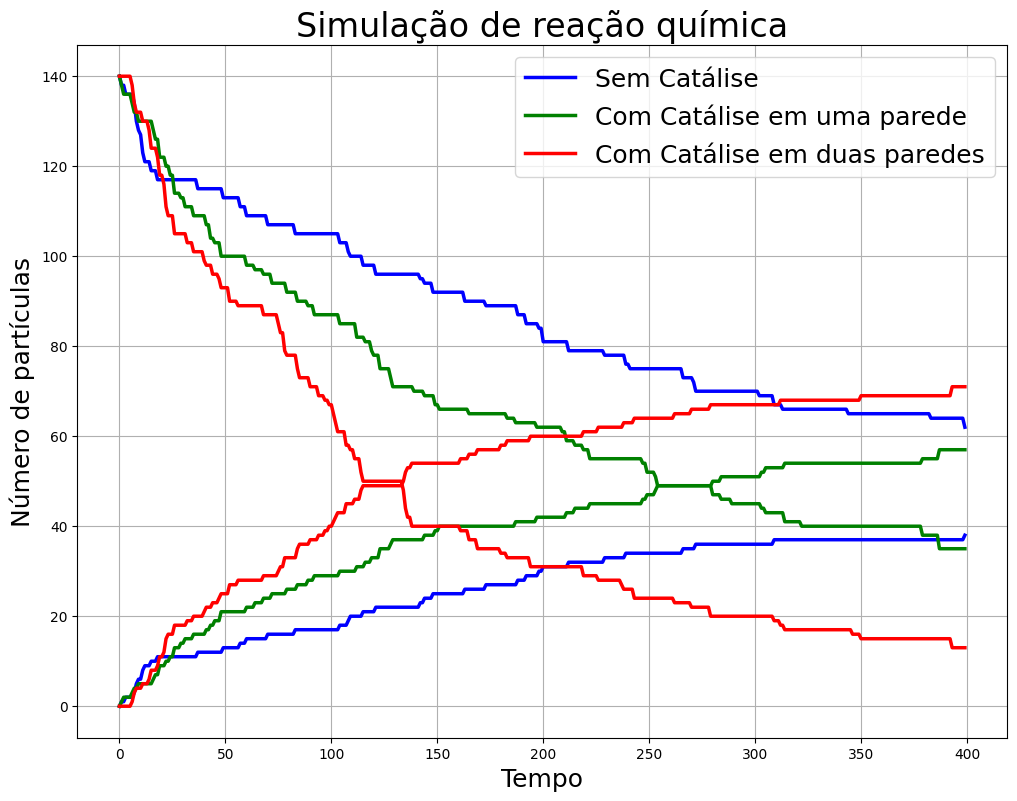

In [9]:
fig, ax = plt.subplots(1,1, figsize = (12, 9))
ax.set_title('Simulação de reação química', fontsize = 24)
ax.set_ylabel('Número de partículas', fontsize = 18)
ax.set_xlabel('Tempo', fontsize = 18)
ax.grid('- -')
ax.plot(range(NUM_STEPS), A, linewidth = 2.5, label = 'Sem Catálise', c = 'b')
#ax.plot(range(NUM_STEPS), B, linewidth = 2.5, c = 'b')

ax.plot(range(NUM_STEPS), A2, linewidth = 2.5, label = 'Com Catálise em uma parede',c='g')
#ax.plot(range(NUM_STEPS), B2, linewidth = 2.5, c = 'g')

ax.plot(range(NUM_STEPS), A3, linewidth = 2.5, label = 'Com Catálise em duas paredes',c='r')
#ax.plot(range(NUM_STEPS), B3, linewidth = 2.5, c = 'r')
ax.legend(fontsize=18)


#plt.savefig(r'resultados/react', dpi = 200)

dados = pd.DataFrame()

dados['A1'] = A
dados['A2'] = A2
dados['A3'] = A3

dados.to_csv('resultados/dados_catalise.csv')